In [2]:
from utils_lib.utils import Utils

import random
import numpy as np


import matplotlib.pyplot as plt
utils = Utils()



rewards_tab = []
r_epi = []

def register_reward(input,_):
    # print("---")
    # print(input)
    val =input['rewards'][0]
    r_epi.append(val)

    if input["dones"][0]:
        rewards_tab.append(np.sum(r_epi)/len(r_epi))
        r_epi.clear()





def get_model_and_env(env_j,policie_i,fe_k,fev_l):
    if not(utils.compatible_env_policie(policie_i,env_j)):
        print("not compatible")

    policie =      utils.all_policies[policie_i]["policie"]
    policie_name = utils.all_policies[policie_i]["name"]

    compute_opti = utils.all_policies[policie_i]["compute_opti"]
    compute_opti = "cpu"
    env =          utils.all_envs[env_j]["env"]
    env_name =     utils.all_envs[env_j]["name"]
    if len(utils.all_feature_extractor) <= fe_k:
        print(len(utils.all_feature_extractor))
        print("bad fe {}".format(fe_k))
    feature_extract = utils.all_feature_extractor[fe_k]
    if len(feature_extract["order"]) <= fev_l:
        print("bad fev {}".format(fev_l))

    feature_extract_name = feature_extract["name"]
    feature_order = feature_extract["order"][fev_l]
    feature_obs_shape = feature_extract["obs_shape"]


    env = utils.get_env(env,env_j,feature_obs_shape)

    policy_kwargs = utils.get_fe_kwargs(env,feature_extract,feature_order,compute_opti)
    if policy_kwargs is not None:
        model = policie(
            policy="MlpPolicy",
            #learning_rate = old_lr,
            env=env,
            policy_kwargs = policy_kwargs,
            device=compute_opti,
            verbose=1,
            #seed=random.randint(100,100000),
            )
    return model,env

none
cpu
Using cpu device
-----------------------------
| time/              |      |
|    fps             | 945  |
|    iterations      | 1    |
|    time_elapsed    | 2    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 745         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.011578258 |
|    clip_fraction        | 0.0951      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.83       |
|    explained_variance   | -0.0782     |
|    learning_rate        | 0.0003      |
|    loss                 | 0.524       |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0147     |
|    std                  | 0.988       |
|    value_loss           | 0.69        |
--------

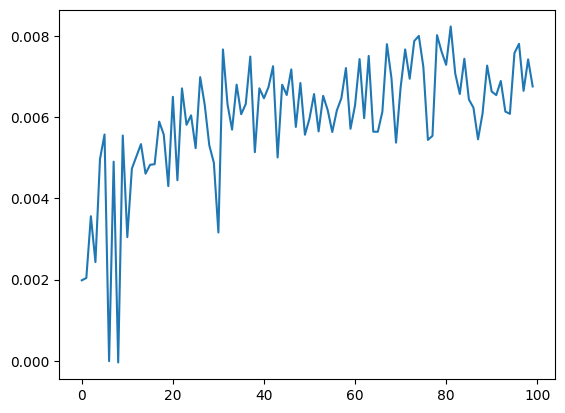

In [17]:

model, env = get_model_and_env(8,3,0,0)


    
model.learn(
    total_timesteps=100000, 
    log_interval=1,
    callback=register_reward
    )

plt.plot(rewards_tab)
plt.show()


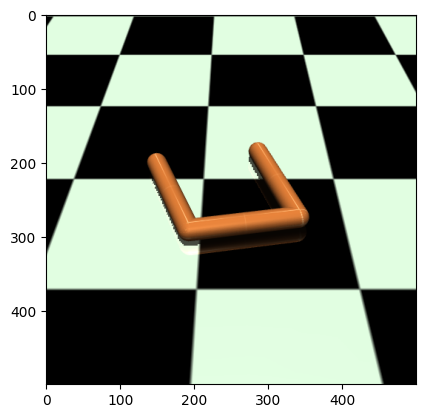

In [19]:

from gym import wrappers
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"
from IPython.display import clear_output


#model, env = get_model_and_env(8,3,0,0)

obs = env.reset()

for i in range(100):


    action, _state = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)

    clear_output(wait=True)
    plt.imshow( env.render(mode='rgb_array') )
    plt.show()
    #env.render()




In [12]:
from IPython import display
%matplotlib inline

In [ ]:
import io
import base64
from IPython.display import HTML

video = io.open('./gym-results/openaigym.video.%s.video000000.mp4' % env.file_infix, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''
    <video width="360" height="auto" alt="test" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''
.format(encoded.decode('ascii')))